In [1]:
%matplotlib inline
import sys
# initialize stuff
if sys.platform == 'darwin':
    plat = 'usb'
    # plat = 'mac'
    sys.path.append('/Users/njchiang/GitHub/LanguageMVPA/multivariate/python/analysis')
    sys.path.append('/Users/njchiang/GitHub/python-fmri-utils/utils')
    debug = True
else:
    plat = 'win'
    sys.path.append('D:\\GitHub\\LanguageMVPA\\multivariate\\python\\analysis')
    sys.path.append('D:\\GitHub\\python-fmri-utils\\utils')
    debug = False
import lmvpautils as lmvpa
paths, subList, contrasts, maskList = lmvpa.initpaths(plat)

Initializing...


In [2]:
# parameters
sub = 'LMVPA005'
roi = "left_IFG_operc"
betatype = 'tstat'
con = "stim"
chance = .5
filterLen = 49
filterOrd = 2
dsType = "Lang"
nVox = 500

In [3]:
# load raw data
thisSub = {sub: subList[sub]}
mc_params = lmvpa.loadmotionparams(paths, thisSub)
beta_events = lmvpa.loadevents(paths, thisSub)
dsdict = lmvpa.loadsubdata(paths, thisSub, m=roi, c='trial_type')
thisDS = dsdict[sub]

loading LMVPA005


 * Please note: warnings are printed only once, but underlying problem might occur many times *


In [4]:
# preprocess raw data
import SavGolFilter as sg
sg.sg_filter(thisDS, filterLen, filterOrd)
from mvpa2.mappers.zscore import zscore
zscore(thisDS, chunks_attr='chunks')

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [5]:
# beta extract raw data
rds, events = lmvpa.amendtimings(thisDS.copy(), beta_events[sub], contrasts)  # adding features

import mvpa2.datasets.eventrelated as er
evds = er.fit_event_hrf_model(rds, events, time_attr='time_coords',
                              condition_attr=('trial_type', 'chunks'),
                              design_kwargs={'add_regs': mc_params[sub], 'hrf_model': 'canonical'},
                              return_model=True)
fds = lmvpa.replacetargets(evds, contrasts, con)
fds = fds[fds.targets != '0']

In [6]:
# load betas
bds = lmvpa.loadsubbetas(paths, sub, btype=betatype, m=roi)

LMVPA005


['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']


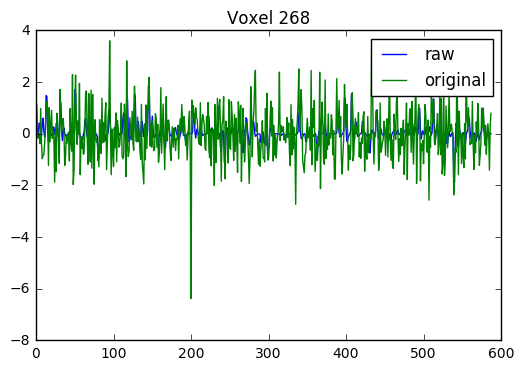

(588,)
(588, 1)


array([[ 1.        ,  0.33754774],
       [ 0.33754774,  1.        ]])

In [7]:
# beta extraction QC
import numpy as np
import matplotlib.pyplot as plt
iVox = np.random.randint(0, rds.shape[1])

print evds.sa.targets
regidx = evds.sa.targets == evds.sa.targets
# regidx = evds.sa.targets == '0'
# plt.plot(evds.sa.regressors.T[:,regidx])
plt.plot(np.dot(evds.sa.regressors.T[:, regidx], evds.samples[regidx,:])[:,iVox], label='raw')
# plt.plot(np.dot(evds.sa.regressors.T[:, regidx], bds.samples[]))[:,iVox] # get these in right order
plt.plot(rds.samples[:, iVox], label='original')
plt.legend()
plt.title('Voxel ' + str(iVox))
plt.show()
print np.dot(evds.sa.regressors.T[:, regidx], evds.samples[regidx,:])[:,iVox].shape
print rds[:,iVox].samples.shape
np.corrcoef(np.dot(evds.sa.regressors.T[:, regidx], evds.samples[regidx,:])[:,iVox], 
            rds.samples[:,iVox])
# print (np.mean(rds, axis=0), np.std(rds, axis=0))

In [14]:
# preprocess betas
zscore(bds, chunks_attr='chunks')
bds = lmvpa.replacetargets(bds, contrasts, con)

# bds.sa['targets'] = bds.sa[con]

array(['l_Console_Anim_Act_Can', 'l_Console_Anim_Act_Rel',
       'l_Console_Anim_Pass_Can', 'l_Console_Anim_Pass_Rel',
       'l_Crush_Inanim_Act_Can', 'l_Crush_Inanim_Act_Rel',
       'l_Crush_Inanim_Pass_Can', 'l_Crush_Inanim_Pass_Rel',
       'l_Hit_Inanim_Act_Can', 'l_Hit_Inanim_Act_Rel',
       'l_Hit_Inanim_Pass_Can', 'l_Hit_Inanim_Pass_Rel',
       'l_Kick_Anim_Act_Can', 'l_Kick_Anim_Act_Rel',
       'l_Kick_Anim_Pass_Can', 'l_Kick_Anim_Pass_Rel',
       'l_Kiss_Anim_Act_Can', 'l_Kiss_Anim_Act_Rel',
       'l_Kiss_Anim_Pass_Can', 'l_Kiss_Anim_Pass_Rel',
       'l_Light_Inanim_Act_Can', 'l_Light_Inanim_Act_Rel',
       'l_Light_Inanim_Pass_Can', 'l_Light_Inanim_Pass_Rel',
       'l_Stretch_Anim_Act_Can', 'l_Stretch_Anim_Act_Rel',
       'l_Stretch_Anim_Pass_Can', 'l_Stretch_Anim_Pass_Rel',
       'l_Touch_Inanim_Act_Can', 'l_Touch_Inanim_Act_Rel',
       'l_Touch_Inanim_Pass_Can', 'l_Touch_Inanim_Pass_Rel',
       's_Console_Anim_Act_Can', 's_Console_Anim_Act_Rel',
       's_Con

In [9]:
# set analysis idx
# flidx = fds.chunks < fds.sa['chunks'].unique[len(fds.sa['chunks'].unique)/2]
# fpidx = fds.chunks >= fds.sa['chunks'].unique[len(fds.sa['chunks'].unique) / 2]
# blidx = bds.sa['stim'].value == 's'
flidx = fds.chunks == fds.chunks
blidx = bds.chunks == bds.chunks

In [10]:
# initialize classifier
from mvpa2.clfs import svm
clf = svm.LinearCSVMC()
from mvpa2.clfs.warehouse import OneWayAnova
fsel = OneWayAnova()
import mvpa2.featsel as fs
fselector = fs.helpers.FixedNElementTailSelector(nVox, tail='upper',
                                                 mode='select', sort=False)
# fselector = fs.helpers.FractionTailSelector(0.05, mode='select', tail='upper')
sbfs = fs.base.SensitivityBasedFeatureSelection(fsel, fselector,
                                                enable_ca=['sensitivities'])
from mvpa2.clfs.meta import FeatureSelectionClassifier
fclf = FeatureSelectionClassifier(clf, sbfs)

from mvpa2.measures.base import CrossValidation
from mvpa2.misc import errorfx
from mvpa2.generators.partition import NFoldPartitioner
cv = CrossValidation(fclf,
                     NFoldPartitioner(attr='chunks'),
                     errorfx=errorfx.mean_match_accuracy)

In [11]:
#SVM
import numpy as np
bres = cv(bds[blidx].copy())
print "beta mean: " + str(np.mean(bres))
cv.untrain()
fres = cv(fds[flidx].copy())
print "from raw mean: " + str(np.mean(fres))

beta mean: 0.0


from raw mean: 0.46875


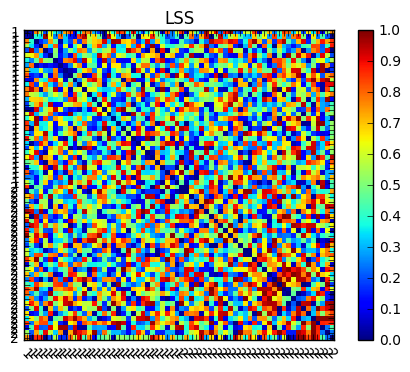

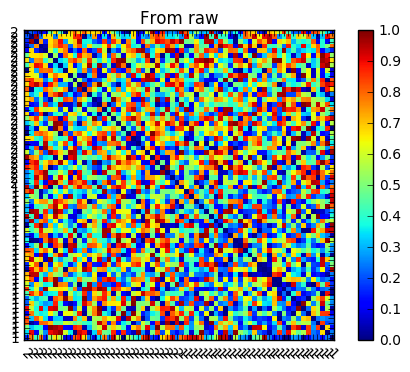

In [12]:
from mvpa2.measures import rsa
dsm = rsa.PDist(square=True)
frsares = dsm(fds[flidx].copy())
brsares = dsm(bds[blidx].copy())
import rsautils as ru
bf, bax = ru.plot_mtx(ru.rankTransform(brsares), bds[blidx].sa.targets, 'LSS')
ff, fax = ru.plot_mtx(ru.rankTransform(frsares), fds[flidx].sa.targets, 'From raw')

In [15]:
print bds.sa.trial_type
print fds.sa.trial_type